In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
def draw_distplot(col_name):
    class_names = ['first', 'second', 'third']
    plt.figure(figsize=(12,5))
    for i in range(0,3):    
        plt.subplot(1,3,i+1)
        sns.distplot(titanic[titanic.pclass == (i + 1)][col_name], axlabel = class_names[i])
    plt.tight_layout()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19000\405300329.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i + 1)][col_name], axlabel = class_names[i])
C:\Users\user\AppData\Local\Temp\ipykernel_19000\405300329.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ti

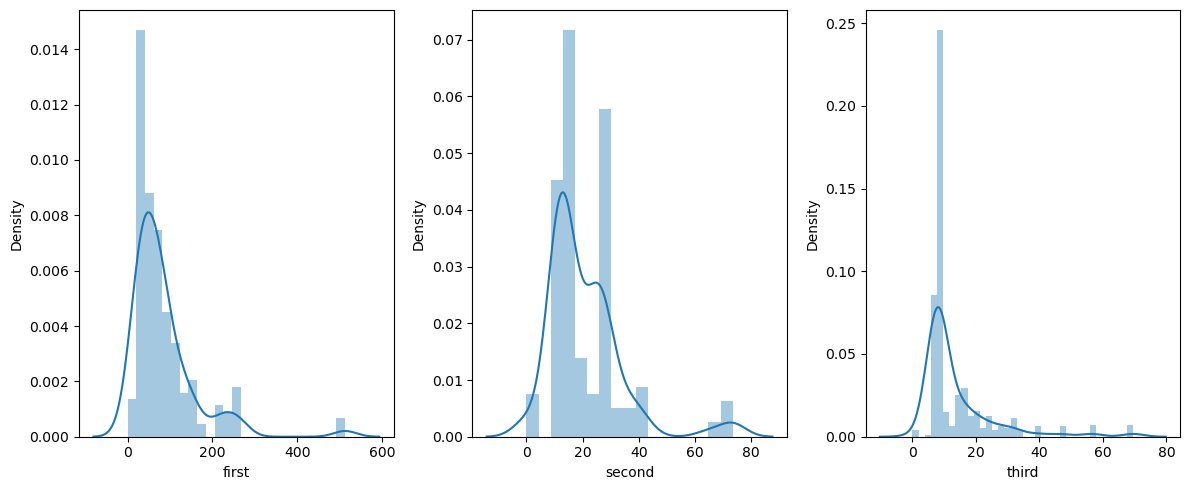

In [9]:
draw_distplot('fare')

In [11]:
print('skew : ', round(titanic.fare.skew(), 2))
print('kurtosis : ', round(titanic.fare.kurt(), 2))

skew :  4.79
kurtosis :  33.4


In [13]:
from sklearn import preprocessing

C:\Users\user\AppData\Local\Temp\ipykernel_19000\405300329.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic.pclass == (i + 1)][col_name], axlabel = class_names[i])
C:\Users\user\AppData\Local\Temp\ipykernel_19000\405300329.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ti

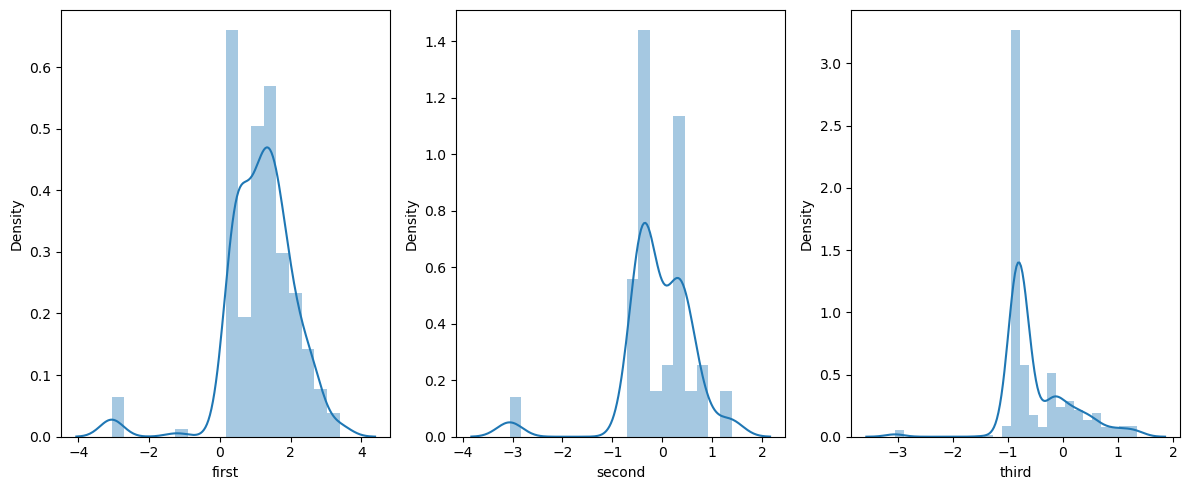

In [15]:
titanic['fare_log'] = preprocessing.scale(np.log(titanic.fare+1))
draw_distplot('fare_log')

In [17]:
print('skew : ', round(titanic.fare_log.skew(), 2))
print('kurtosis : ', round(titanic.fare_log.kurt(), 2))

skew :  0.39
kurtosis :  0.98


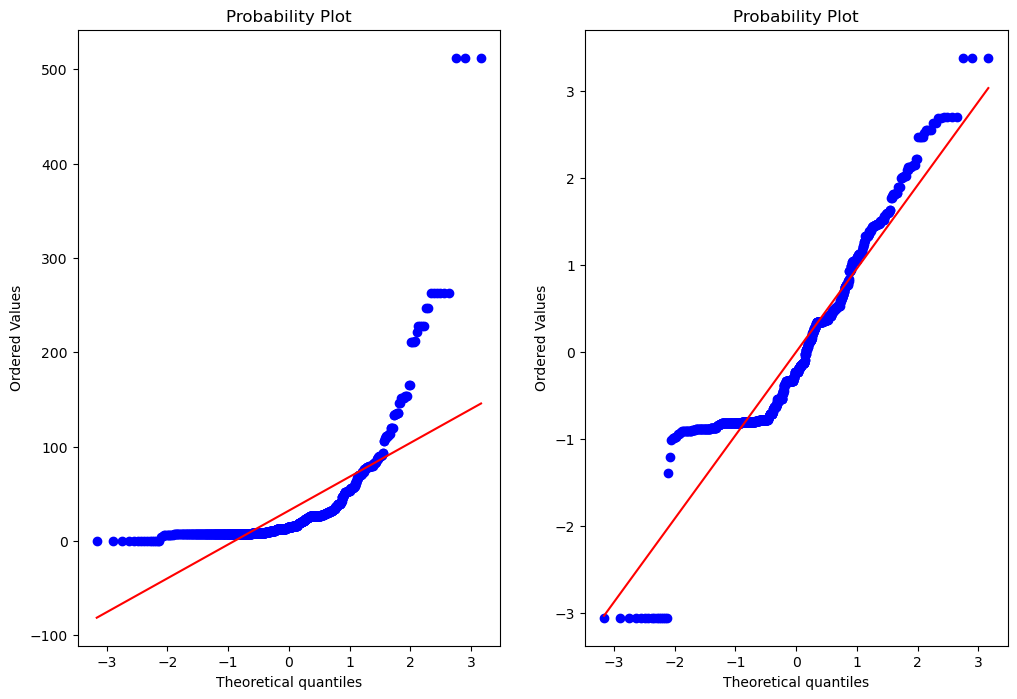

In [19]:
from scipy import stats

fig = plt.figure(figsize = (12,8))

fig.add_subplot(1,2,1)
res = stats.probplot(titanic['fare'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(titanic['fare_log'], plot=plt)